### 목표 : 생선 품종 분류 모델
    - 데이터 : 2가지 품종의 생선 데이터 fish.csv
    - Feature : Weight, Length
    - Target : Species
    - 유   형 : 지도 학습 / 분류
<hr>

(1) 모듈 준비

In [130]:
import pandas as pd # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier # 기계학습 관련 모듈

In [131]:
data_file='fish.csv'


# 5개의 피처/특성 중 2개의 피처 특성 선택

fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [132]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt']) # Boolean indexing

# 해당 행만 도출
twoFishDF=fishDF[mask] # species가 bream, smelt인 것만 필터링 하여 도출.

In [133]:
# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피처 스케일링 

In [134]:
# 표준 정규 분포  = 평균 0, 표준편차 1 => z-score = (피처 - 평균)/표준편차
# Weight 컬럼
twoFishDF['Weight'].mean(), twoFishDF['Weight'].std()

(444.5, 328.1432328267642)

In [135]:
#ret1 = twoFishDF['Weight'] - twoFishDF['Weight'].mean()
#ret1/twoFishDF.Weight.std() -> 정규화 과정. 확률변수 z로 만드는 과정.

In [136]:
#twoFishDF.loc[:, 'Weight'] = ret1 # : ==> 처음부터 끝까지.

(3) 기계학습 데이터셋 준비 => 피처와 타겟 분리<hr>


In [137]:
# 피처/특성/속성 데이터 추출
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [138]:
#클래스/타겟/라벨 데이터 추출
targetDF = twoFishDF['Species']
targetDF.head(2)
twoFishDF = twoFishDF.replace({'Bream':0, 'Smelt':1})
#twoFishDF

(3-1) 학습 / 테스트 데이터 셋 분리 <hr>
- 지도 학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80:20

In [139]:
#모듈 로딩
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, stratify=targetDF)

In [141]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---> \n{x_train.shape}, {y_train.shape}')
print(f'{y_train.value_counts()/y_train.shape[0]}')
print(f'테스트용 데이터셋 ---> \n{x_test.shape}, {y_test.shape}')
print(f'{y_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---> 
(39, 2), (39,)
Species
Bream    0.717949
Smelt    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ---> 
(10, 2), (10,)
Species
Bream    0.7
Smelt    0.3
Name: count, dtype: float64


(3-2) 피처 데이터의 스케일링<hr> 
- 피처들의 값의 범위가 다른 것을 통일 시켜줌.
- scikit-learn의 preprocessing 모듈 활용

In [142]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [143]:
# 표준정규분포 스케일링 : 평균 0, 편차1
#(1) 스케일러 인스턴스 생성
#(2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메서드
#(3) 데이터에 대한 스케일링 진행 : transform() 메서드

In [144]:
scaler = StandardScaler()

In [145]:
scaler.fit(x_train)

StandardScaler()

In [146]:
scaler.mean_

array([448.69230769,  27.24358974])

In [147]:
# 학습용 데이터 피처 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(39, 2)

In [148]:
# 테스트용 데이터 피처 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(10, 2)

(3-3) 시각화

In [149]:
# 모듈 로딩
import matplotlib.pyplot as plt

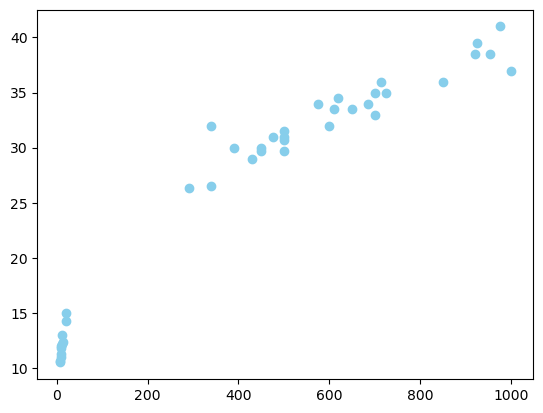

In [150]:
## -> 원본 데이터 시각화
plt.scatter(x_train['Weight'], x_train['Length'], c = 'skyblue')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 16    Bream
30    Bream
37    Smelt
48    Smelt
12    Bream
11    Bream
33    Bream
18    Bream
2     Bream
44    Smelt
19    Bream
42    Smelt
22    Bream
4     Bream
46    Smelt
25    Bream
38    Smelt
36    Smelt
45    Smelt
40    Smelt
8     Bream
31    Bream
28    Bream
21    Bream
43    Smelt
7     Bream
32    Bream
13    Bream
29    Bream
1     Bream
10    Bream
5     Bream
27    Bream
47    Smelt
24    Bream
9     Bream
20    Bream
6     Bream
14    Bream
Name: Species, dtype: object

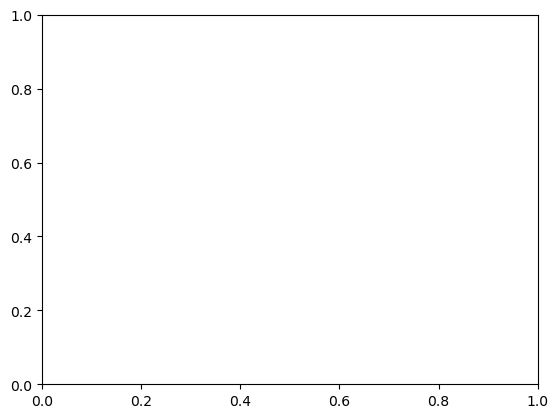

In [151]:
## -> 스케일된 데이터의 시각화 => scaled_x_train ndarray 타입
#scaled_x_test:
plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1], c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')

(4) 학습 진행


In [ ]:
## 방법 : KNN 알고리즘
fishModel = KNeighborsClassifier()
fishModel

KNeighborsClassifier()

In [ ]:
# 학습
fishModel.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [ ]:
(5) 테스트 진행

In [ ]:
fishModel.score(scaled_x_test, y_test)

1.0

(3) 기계학습을 위한 데이터 준비
- 피처/특성 + 타겟/라벨/클래스
- 학습용 데이터셋 : 80%
- 테스트용 데이터셋 : 20%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려하여 학습&테스트용 데이터셋 준비

In [ ]:
# 데이터 섞기 => 100% 모두 섞기
twoFishDF = twoFishDF.sample(frac=1.0)
print(twoFishDF.shape)
twoFishDF # 섞인 것 확인 가능

# frac은 DataFrame에서 샘플을 추출할 때 선택하는 비율을 나타내는 매개변수. 
# 값은 0과 1 사이의 실수, 0은 샘플을 선택하지 않음을 의미, 1은 전체 DataFrame을 선택함을 의미.

(49, 3)


,Species,Weight,Length
40,1,8.7,11.3
16,0,700.0,33.0
32,0,925.0,39.5
43,1,9.8,12.0
9,0,500.0,30.7
27,0,714.0,36.0
10,0,475.0,31.0
20,0,575.0,34.0
7,0,390.0,30.0
2,0,340.0,26.5


In [ ]:
# 학습과 테스트 비율 조절 갯수 계산

num = round(twoFishDF.shape[0]*0.8)


# 학습 데이터셋 추출
trainDF = twoFishDF.iloc[:num+1] # 0번부터 num번까지.

# 테스트 데이터셋으로 추출
testDF = twoFishDF.iloc[num+1:] # num+1부터 끝까지.

# 테스트 데이터셋 출력
print(f'\ntest => {testDF.shape}\n{testDF.tail(3)}')


test => (9, 3)
    Species  Weight  Length
4         0   430.0    29.0
25        0   725.0    35.0
14        0   600.0    32.0


(3-2) scikit learn 모듈 활용한 학습&테스트용 데이터셋 준비
- 추가 모듈 로딩

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle=True, train test : 0.75:0.25
## -- [반환] 학습용 피처, 테스트용 피처, 학습용 타겟, 테스트용 타겟

x_train, x_test, y_train, y_test = train_test_split(featuresDF, targetSR)

print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print()
print(x_train.head(2), y_train.head(2), sep='\n')
print()
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
print()
print(x_test.head(2), y_test.head(2), sep='\n')
print()

# 타겟 / 클래스 
print(f'{y_train.value_counts()/y_test.shape[0]}')
print(f'{y_test.value_counts()/y_train.shape[0]}')

NameError: name 'featuresDF' is not defined

In [ ]:
## -- 비율 설정 학습/테스트셋 분리
## -- [기본] shuffle=True
## -- [전달] 피처데이터/타겟데이터
## -- [설정] train test : 0.9:0:1 => test_size, train_size 매개변수 값
## -- [반환] 학습용 피처, 테스트용 피처, 학습용 타겟, 테스트용 타겟

x_train, x_test, y_train, y_test = train_test_split(featuresDF, targetSR, test_size=0.1)


print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print()
print(x_train.head(2), y_train.head(2), sep='\n')
print()
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
print()
print(x_test.head(2), y_test.head(2), sep='\n')

x_train : (44, 2), y_train : (44,)

    Weight  Length
19   650.0    33.5
9    500.0    30.7
19    0
9     0
Name: Species, dtype: int64

x_test : (5, 2), y_test : (5,)

   Weight  Length
7   390.0    30.0
6   500.0    29.7
7    0
6    0
Name: Species, dtype: int64


In [ ]:
## -- 비율 설정 하는 학습/테스트셋 분리
## -- [기본] shuffle=True
## -- [전달] 피처데이터/타겟데이터
## -- [설정] train test : 0.9:0:1 => test_size, train_size 매개변수 값 설정
## --       분류할 때 타겟이 불균형일 경우, 비율 지정하는 stratify 매개변수 설정. 
## -- [반환] 학습용 피처, 테스트용 피처, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featuresDF, targetSR, test_size=0.1, stratify=targetSR) # 타겟이 불균형하기 때문에 stratify의 매개변수를 타겟으로 지정.

In [ ]:
# 검증용 데이터셋 준비 => 학습용 데이터셋에서 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train)
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print()
print(x_train.head(2), y_train.head(2), sep='\n')
print()
print(f'x_val : {x_val.shape}, y_val : {y_val.shape}')
print()
print(x_val.head(2), y_val.head(2), sep='\n')
print()
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
print()
print(x_test.head(2), y_test.head(2), sep='\n')


x_train : (32, 2), y_train : (32,)

   Weight  Length
2   340.0    26.5
1   290.0    26.3
2    0
1    0
Name: Species, dtype: int64

x_val : (4, 2), y_val : (4,)

    Weight  Length
40     8.7    11.3
13   340.0    32.0
40    1
13    0
Name: Species, dtype: int64

x_test : (13, 2), y_test : (13,)

    Weight  Length
34   950.0    41.0
44    12.2    12.2
34    0
44    1
Name: Species, dtype: int64


(4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 -> fit() 메서드

In [ ]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [ ]:
# 학습 진행 => 학습용 데이터로 진행. 
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.svm import SVC

fishModel2 = SVC()

fishModel2.fit(scaled_x_train, y_train)

SVC()

In [ ]:
from sklearn.linear_model import LogisticRegression

fishModel3 = LogisticRegression()
fishModel3.fit(scaled_x_train, y_train)

LogisticRegression()

(5) 테스트 진행 => 학습에 사용되지 않은 데이터로 진행

In [ ]:
#model.score(x_val, y_val)

In [ ]:
print('KNN : ', fishModel.score(scaled_x_test, y_test))
print('SVC : ', fishModel2.score(scaled_x_test, y_test))
print('LogisticRegression : ', fishModel3.score(scaled_x_test, y_test))

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Bream' 'Smelt'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

(6) 모델 활용 예측 => 새로운 데이터로 진행.

In [ ]:
model.predict(x_test) # 예측값

array([0, 0, 0, 1, 0], dtype=int64)

In [ ]:
y_test

21    0
28    0
19    0
36    1
11    0
Name: Species, dtype: int64

(6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측

===> 학습할 때 전달되는 피처형태와 동일한 데이터.

In [ ]:
# 길이 25, 무게 160인 생선의 품종을 예측해 보기.
new_data=pd.DataFrame([[160, 25]], columns = twoFishDF.columns[1:])

new_data

,Weight,Length
0,160,25


In [ ]:
# 피처스케일링 진행 
scaled_new_data = scaler.transform(new_data)

In [ ]:
# 예측
y_pre = fishModel.predict(scaled_new_data)

차원 -> 피처의 개수